# **Implementación de aprendizaje máquina sin frameworks**

## **Instrucciones**

**Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

Entregable: Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

1.  Crea un repositorio de GitHub para este proyecto.
2.  Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.
3.  Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
4.  Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Introducción**
*Correcion: Se agrego la descripción de los datos*

Primero, comenzamos cargando el set de datos que utilizaremos para el modelo.

En este caso serán los datos de **wine**. Este set de datos se puede encontrar en este link:

https://github.com/FranciscoMest02/PortafolioImplementacionTC3006/tree/main/MachineLearning/Implementacion%20sin%20framework/data

El set de datos consta de 178 registros, para tres clases diferentes de vino. Estas están solamente categorizadas como 1, 2 y 3.

Las variables independientes son Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline   

A pesar de que el set de datos presenta tres clases y podríamos hacer un modelo de clasificación, trataremos de predecir una variable basado en otra variable. Esto para poder **implementar una regresión lineal**.

## **Inicio de la solución**

Aquí iniciamos la información que vamos a usar en el problema, nos conectamos con google drive y nos movemos a la capeta donde se encuentra el dataset

In [ ]:
#Cargamos los archivos
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive")  # utiliza comando

!pwd

#put your own path in google drive
%cd '/content/gdrive/MyDrive/Tec/ColabAI/wine/'
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/Tec/ColabAI/wine
wine.data  wine.names


Importamos las librerias que vamos a utilizar. Depués leemos el archivo y para comprobar que todo está correto, imprimimos los primeros datos.

In [ ]:
import pandas as pd # importar libreria

columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of Ash", "Magnesium","Total phenols", "Flavanoids","Nonflavanoid phenols", "Proanthocyanins","Color intensity", "HUE","OD280/OD315 of diluted wines", "Proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data', names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df.head() # mostrar las primeras líneas del dataset que se cargó
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,HUE,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## **Definición del problema**

Como estamos usando un dataset nuevo, tenemos que ver que variables muestran un comportamiento lineal para poder probar el modelo lineal sobre ellos. Es por esto que a continuación se hace una matriz de correlación.

In [ ]:
# Select only the specified columns from the DataFrame
selected_columns = df[columns]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                                 Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of Ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
HUE                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

Podemos ver que, las variables de Total phenols y Flavanoids tienen una alta correlación, con un valor de 0.86 en la matriz. Es por esto que se seleccionan estas variables para hacer el modelo. Para visualizar su correlación podemos ver el siguiente gráfico.

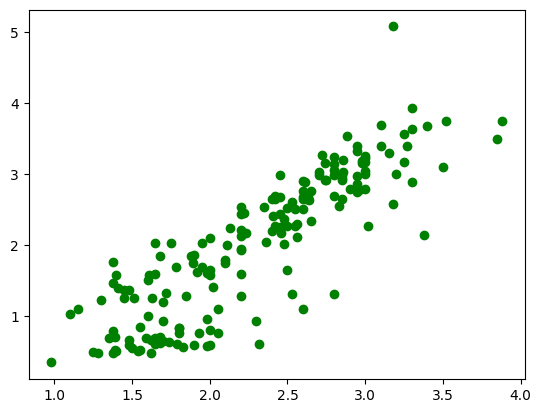

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df['Total phenols'],df['Flavanoids'],color='g')

## **Implementación de la regresión lineal**

Podemos ver que el comportamiento que tienen estas variables puede ser determinado por una regresión lineal. A partir de aquí iniciamos con su implementación.

Definimos las variables que vamos a utilizar y les damos un eje (x y y). Además, inicializamos los valores del modelo para theta (coeficientes de la función de predicción) y alpha (taza de aprendizaje)

In [ ]:
x = df['Total phenols']
y = df['Flavanoids']

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]

# Cargar el valor del learning rate (alpha)
alpha = 0.1

### Separacion de los datos
*Correcion: Se agrego esta seccion para separar los datos en subsets*

In [ ]:
#Correccion

from sklearn.model_selection import train_test_split #importamos la funcion para hacer split de los datos

#Otenemos nuestros datos de prueba, validacion y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Una vez definidas las variables iniciales, creamos nuestro modelo representado por h, el cual tiene la forma de una función lineal.

In [ ]:
# Crear función lambda para la función de hipótesis
h = lambda x,theta: theta[0] + theta[1] * x

# Calcular el total de muestras a partir de los datos (n)
n = len(x)

Se inicia el proceso de calcular los valores necesarios para que theta se ajuste al modelo. No se usan tantas repeticiones ya que con estas es suficiente para llegar a un resultado estable.

In [ ]:
its = 10000 #Variable para definir el numero de iteraciones

for i in range(its):
  # Calcular delta para theta0 y para cada muestra
  # Calcular delta para theta1 y para cada muestra
  # Calcular sumatorias y promedio
  delta = []
  deltax = []
  #Correccion, cambio a las variables de train
  for xi,yi in zip(X_train,y_train):
    pred = h(xi,theta)
    delta.append(pred-yi)
    deltax.append((pred-yi)*xi)

  dJt0 = 1/n*sum(delta)
  dJt1 = 1/n*sum(deltax)

  theta[0] = theta[0] - alpha*dJt0
  theta[1] = theta[1] - alpha*dJt1

print(theta)

[-1.0589220912589001, 1.337231001257542]


Podemos ver que los valores finales de theta cambiaron, pero para comprobar que sean acertados, podemos gráficar los datos y la función de predicción

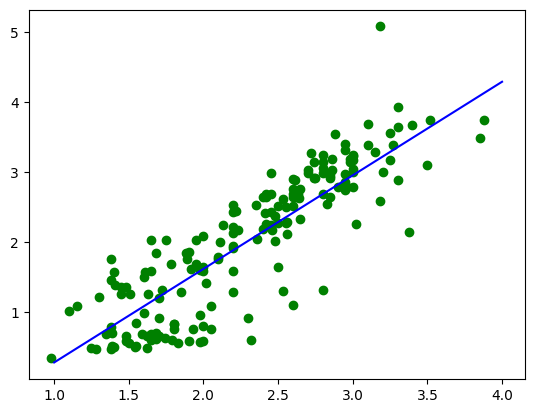

In [ ]:
x_range = range(round(min(x)), round(max(x)) + 1)
hypothesis_line = [h(x_val, theta) for x_val in x_range]
plt.plot(x_range, hypothesis_line, color='blue', label='Hypothesis Line')
plt.scatter(x, y,color='g')
plt.show()

En la gráfica se puede observar que la línea se ajusta correctamente al comportamiento de los datos.

## **Pruebas**

Finalmente, podemos probar el modelo usando diferentes valores de Total Flavanoids, y los resultados que obtenemos tienen lógica en comparación de los datos obtenidos del dataset

### Pruebas con valores especificos

Para empezar a probar el modelo, podemos probar con datos aleatorios que no estén en el set de datos (pero que sí esten en el rango de los datos) para ver si los resultados también están en los rangos esperados.

In [ ]:
h(2.5, theta)

2.2841554118849547

In [ ]:
h(1.5, theta)

0.9469244106274128

In [ ]:
h(4, theta)

4.290001913771268

### Pruebas con el set de datos de train
*Correcion: Se agrego esta seccion*

Antes de hacer pruebas con el set de datos de testing, podemos ver que tan bien hace las predicciones con los datos que ya ha visto.

In [ ]:
#Correcion

y_pred = []
for xi in X_train:
  y_pred.append(h(xi, theta))

print(y_pred)

[2.685324712262217, 1.3347214009920998, 3.6481310331676475, 2.4178785120107094, 2.1504323117592, 2.096943071708899, 1.8829861115076925, 2.324272341922681, 1.6155399112561837, 2.685324712262217, 1.9231030415454182, 1.8829861115076925, 0.920179790602262, 2.2172938618220774, 1.5486783611933064, 3.2202171127652344, 2.752186262325094, 1.3480937110046753, 1.107392130778318, 1.8829861115076925, 1.4818168111304295, 2.4178785120107094, 2.2172938618220774, 2.4312508220232845, 0.2515642899734909, 2.351016961947831, 1.4149552610675526, 0.920179790602262, 1.8829861115076925, 2.2841554118849547, 2.1504323117592, 0.7864566904765076, 2.685324712262217, 2.1771769317843512, 2.2841554118849547, 0.6126166603130272, 1.0940198207657426, 2.8859093624508487, 1.2143706108789212, 2.4446231320358596, 2.685324712262217, 1.0137859606902897, 2.6050908521867653, 1.468444501117854, 2.952770912513726, 1.080647510753167, 2.8859093624508487, 3.153355562702357, 1.789379941419664, 2.4579954420484347, 2.2574107918598036, 0

Una vez que tenemos las predicciones para los datos que ya vio el modelo, podemos compararlas con los valores esperados. Estos resultados se muestran en la siguiente tabla.

In [ ]:
#Correcion
import pandas as pd

# Create a DataFrame
dfResult = pd.DataFrame({'X_test': X_train, 'y_test': y_train, 'y_pred': y_pred})

# Display the DataFrame
print(dfResult)

     X_test  y_test    y_pred
158    2.80    1.31  2.685325
137    1.79    0.60  1.334721
98     3.52    3.75  3.648131
159    2.60    1.10  2.417879
38     2.40    2.64  2.150432
..      ...     ...       ...
71     2.95    2.86  2.885909
106    1.65    2.03  1.147509
14     3.30    3.64  3.353940
92     1.38    1.46  0.786457
102    2.56    2.11  2.364389

[142 rows x 3 columns]


Y para ver el desempeño, podemos usar el $R^2$ y el **mean squared error (MSE)**. Estas metricas nos indicarán que tan bien el modelo representa a lso datos y que tanto error hay en las predicciones, respectivamente.

Los resultados que obtenemos no son los mejores, pero el modelo es algo decente para predecir los datos.

In [ ]:
#Correcion
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred) #R-squared (R2) Score
r2

0.7211939017296785

In [ ]:
#Correcion
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred) #Mean Squared Error (MSE)
print("Intervalo: " + str(min(x)) + " - " + str(max(x)))
print(mse)

Intervalo: 0.98 - 3.88
0.2791563066048282


### Pruebas con set de datos de test
*Correcion: Se agrego esta seccion*

Ahora, probemos si el modelo es bueno utilizando el set de datos de testing. A continuación se hacen las predicciones para este set de datos.

In [ ]:
#Correcion

y_pred = []
for xi in X_test:
  y_pred.append(h(xi, theta))

print(y_pred)

[2.551601612136463, 2.752186262325094, 1.0004136506777146, 2.952770912513726, 1.762635321394513, 2.685324712262217, 1.6155399112561837, 1.3480937110046753, 2.6050908521867653, 0.8132013105016584, 2.324272341922681, 0.8132013105016584, 2.2172938618220774, 1.1207644407908932, 2.752186262325094, 2.351016961947831, 2.2574107918598036, 1.6155399112561837, 2.926026292488575, 2.364389271960407, 3.353940212890988, 2.926026292488575, 1.6824014613190605, 1.588795291231033, 0.7998290004890829, 0.7463397604387816, 1.6155399112561837, 2.1771769317843512, 1.080647510753167, 2.899281672463424, 2.4847400620735858, 1.9097307315328431, 0.9469244106274128, 2.765558572337669, 2.4178785120107094, 3.2870786628281117]


Podemos hacer una comparación de los resultados esperados (y_test) y los resultados obtenidos (y_pred). En la siguiente tabla se ven los resultados, que aunque no son exactos, son bastante parecidos.

In [ ]:
#Correcion

# Create a DataFrame
dfResult = pd.DataFrame({'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred})

# Display the DataFrame
print(dfResult)

     X_test  y_test    y_pred
19     2.70    3.03  2.551602
45     2.85    2.65  2.752186
140    1.54    0.50  1.000414
30     3.00    3.25  2.952771
67     2.11    2.00  1.762635
16     2.80    3.14  2.685325
119    2.00    1.64  1.615540
174    1.80    0.75  1.348094
109    2.74    2.92  2.605091
141    1.40    0.50  0.813201
24     2.53    2.61  2.324272
150    1.40    1.57  0.813201
41     2.45    2.68  2.217294
118    1.63    1.25  1.120764
15     2.85    2.91  2.752186
111    2.55    2.27  2.351017
113    2.48    2.01  2.257411
82     2.00    1.58  1.615540
9      2.98    3.15  2.926026
114    2.56    2.29  2.364389
18     3.30    3.93  3.353940
66     2.98    3.18  2.926026
60     2.05    1.09  1.682401
169    1.98    0.96  1.588795
171    1.39    0.51  0.799829
164    1.35    0.68  0.746340
117    2.00    2.09  1.615540
65     2.42    2.65  2.177177
90     1.60    1.50  1.080648
55     2.96    2.78  2.899282
29     2.65    2.33  2.484740
128    2.22    2.45  1.909731
145    1.5

Finalmente, para ver el desempeño del modelo podemos usar las metricas de **$R^2$** para determinar que tan bien nuestra regresión lineal representa a los datos. En este caso, tenemos un valor de 0.85, por lo que es un modelo bastante bueno para hacer las predicciones.

In [ ]:
#Correcion
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) #R-squared (R2) Score
r2

0.8481877673672711

Por el otro lado, podemos verificar que tanto error tiene el modelo al momento de hacer las predicciones usando **MSE (Mean Squared Error)**. En promedio tiene un error de 0.1430 en las predicciones. Si vemos el rango de los valores, podemos decir que el modelo no es super precisio pero tiene un error aceptable

In [ ]:
#Correcion
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred) #Mean Squared Error (MSE)
print("Intervalo: " + str(min(x)) + " - " + str(max(x)))
print(mse)

Intervalo: 0.98 - 3.88
0.14295664791546162
